# ***Lungs Model***

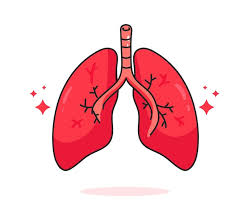

# *Import Rquired Libraries*

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pickle
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# *Downloading Dataset*

In [16]:
from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [17]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
lung-and-colon-cancer-histopathological-images.zip: Skipping, found more recently modified local copy (use --force to force download)


# *UnZipping lung-and-colon-cancer-histopathological-image*

In [18]:
!unzip lung-and-colon-cancer-histopathological-images.zip -d lung_Colon

Streaming output truncated to the last 5000 lines.
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_Colon/lung_colon_image_set/lung_image_sets/lung

# Making a directory path for our Data

In [19]:
data_dir = pathlib.Path('/content/lung_Colon/lung_colon_image_set/lung_image_sets')

In [20]:
list(data_dir.glob('*/*.jpeg'))[:5]

[PosixPath('/content/lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc4549.jpeg'),
 PosixPath('/content/lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1036.jpeg'),
 PosixPath('/content/lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc4460.jpeg'),
 PosixPath('/content/lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc1902.jpeg'),
 PosixPath('/content/lung_Colon/lung_colon_image_set/lung_image_sets/lung_scc/lungscc3420.jpeg')]

# *Getting The number of Images in Dataset*

In [21]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

15000


# *listing all Lung adenocarcinoma Images*

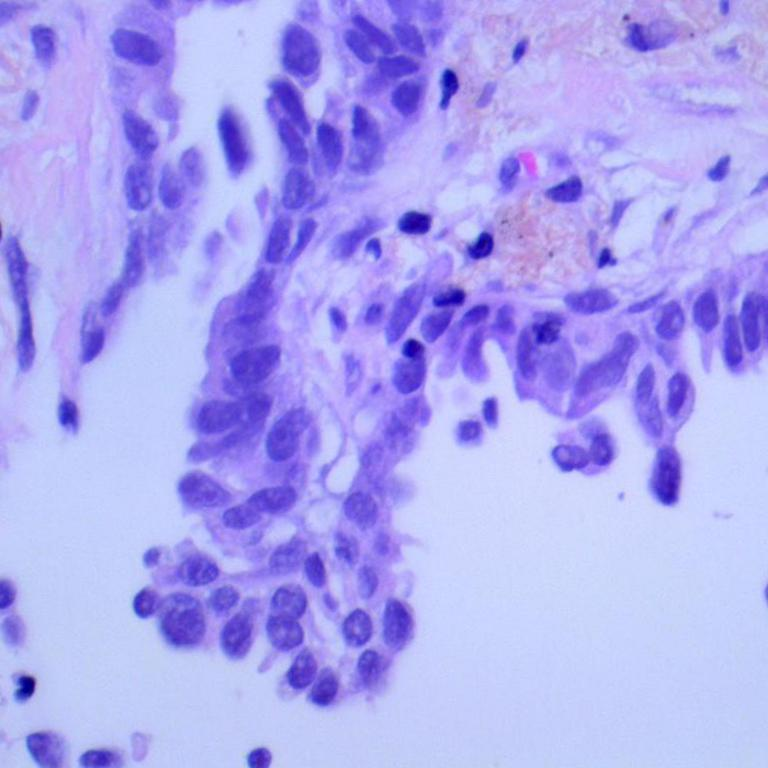

In [22]:
lung_aca = list(data_dir.glob('lung_aca/*'))
PIL.Image.open(str(lung_aca[0]))

# *listing all Lung benign tissue Images*

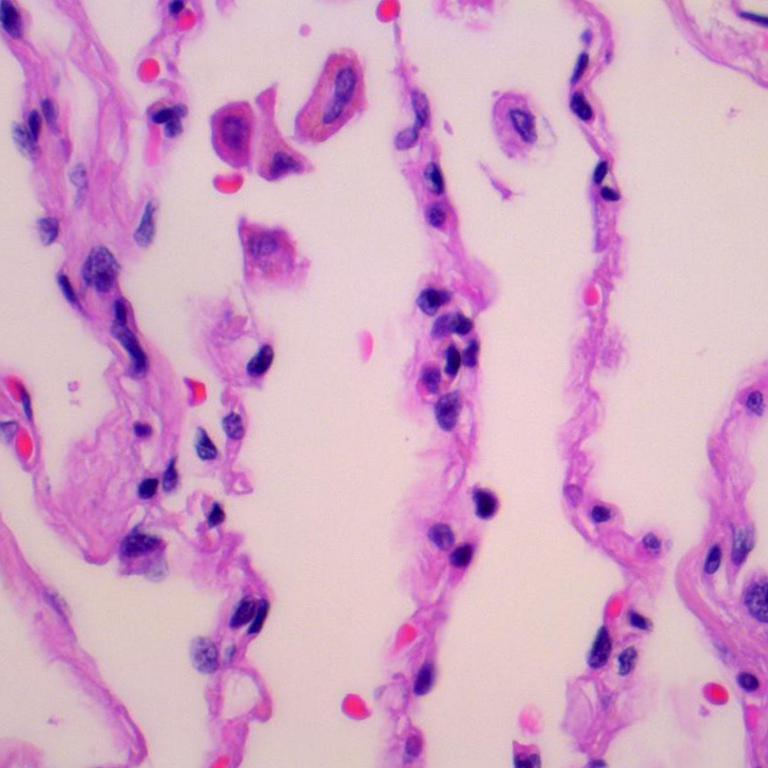

In [23]:
lung_n= list(data_dir.glob('lung_n/*'))
PIL.Image.open(str(lung_n[0]))

# *listing all Lung squamous cell carcinoma Images*

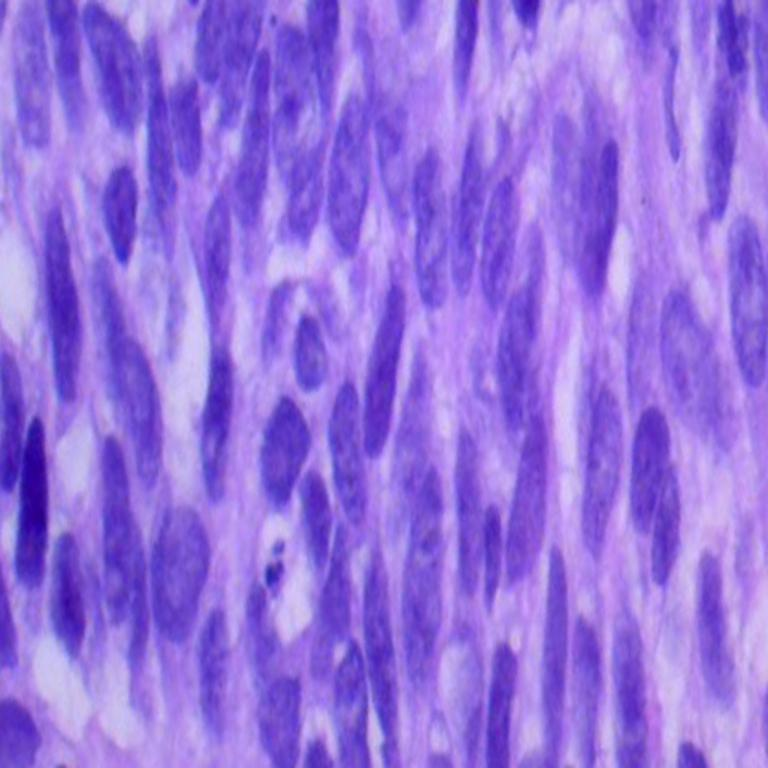

In [24]:
lung_scc= list(data_dir.glob('lung_scc/*'))
PIL.Image.open(str(lung_scc[0]))

# *Plotting The Count of each Class*

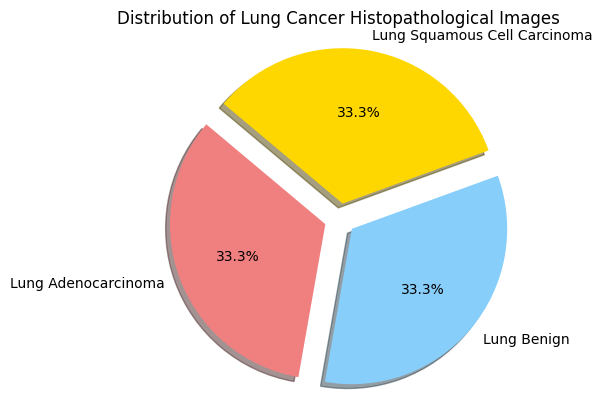

In [25]:
# Count the number of images in each class
lung_aca_count = len(list(data_dir.glob('lung_aca/*.jpeg')))
lung_n_count = len(list(data_dir.glob('lung_n/*.jpeg')))
lung_scc_count = len(list(data_dir.glob('lung_scc/*.jpeg')))

# Create a pie chart
labels = ['Lung Adenocarcinoma', 'Lung Benign', 'Lung Squamous Cell Carcinoma']
sizes = [lung_aca_count, lung_n_count, lung_scc_count]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0.1, 0.1)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Lung Cancer Histopathological Images')
plt.show()


# *Making a dictionary for all lung Images*

In [26]:
lung_images_dict = {
    'lung_aca': list(data_dir.glob('lung_aca/*')),
    'lung_n': list(data_dir.glob('lung_n/*')),
    'lung_scc': list(data_dir.glob('lung_scc/*')),
}

# *Making a dictionary for all lables*

In [27]:
lung_labels_dict = {
    'lung_n': 0,
    'lung_aca': 1,
    'lung_scc':2,
}

# *Separating The Features and Target and Resizing The Images*

In [28]:
X, y = [], []
for diagnosis, images in lung_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(80,80))
        X.append(resized_img)
        y.append(lung_labels_dict[diagnosis])

In [29]:
X = np.array(X)
y = np.array(y)

# *Splitting The Data into train and test*

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)

# *Normaliztion*

In [31]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# *CNN Architecture*

In [32]:
num_classes = 3

model1 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history=model1.fit(X_train_scaled, y_train, validation_split=0.15 ,batch_size=32,epochs=10 )

Epoch 1/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - accuracy: 0.6976 - loss: 0.5967 - val_accuracy: 0.9002 - val_loss: 0.2827
Epoch 2/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 87s 246ms/step - accuracy: 0.8958 - loss: 0.2628 - val_accuracy: 0.9252 - val_loss: 0.2112
Epoch 3/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 136s 229ms/step - accuracy: 0.9149 - loss: 0.2099 - val_accuracy: 0.9090 - val_loss: 0.2219
Epoch 4/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 77s 228ms/step - accuracy: 0.9333 - loss: 0.1639 - val_accuracy: 0.9164 - val_loss: 0.1989
Epoch 5/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 81s 225ms/step - accuracy: 0.9455 - loss: 0.1339 - val_accuracy: 0.9509 - val_loss: 0.1383
Epoch 6/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 82s 225ms/step - accuracy: 0.9569 - loss: 0.1122 - val_accuracy: 0.9446 - val_loss: 0.1632
Epoch 7/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - accuracy: 0.9539 - loss: 0.1107 - val_accuracy: 0.9482 - val_loss: 0.1494
Epoch 8/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 81s 224ms/step - accuracy: 0.9591 - loss: 

# *Evaluating The Model*

In [33]:
model1.evaluate(X_test_scaled,y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9487 - loss: 0.1768


[0.1428305208683014, 0.9559999704360962]

# *Prediction of Model*

In [34]:
predictions = model1.predict(X_test_scaled)
predictions

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step


array([[2.9884155e-12, 1.5652500e-04, 9.9984360e-01],
       [9.9999994e-01, 6.6584850e-17, 1.9337452e-29],
       [5.1355650e-15, 5.7064003e-04, 9.9942935e-01],
       ...,
       [2.8725242e-15, 7.3945757e-06, 9.9999255e-01],
       [5.5064861e-13, 4.1254076e-05, 9.9995875e-01],
       [9.3076209e-14, 6.2950821e-05, 9.9993706e-01]], dtype=float32)

# *plotting random images with predicted and True Class*

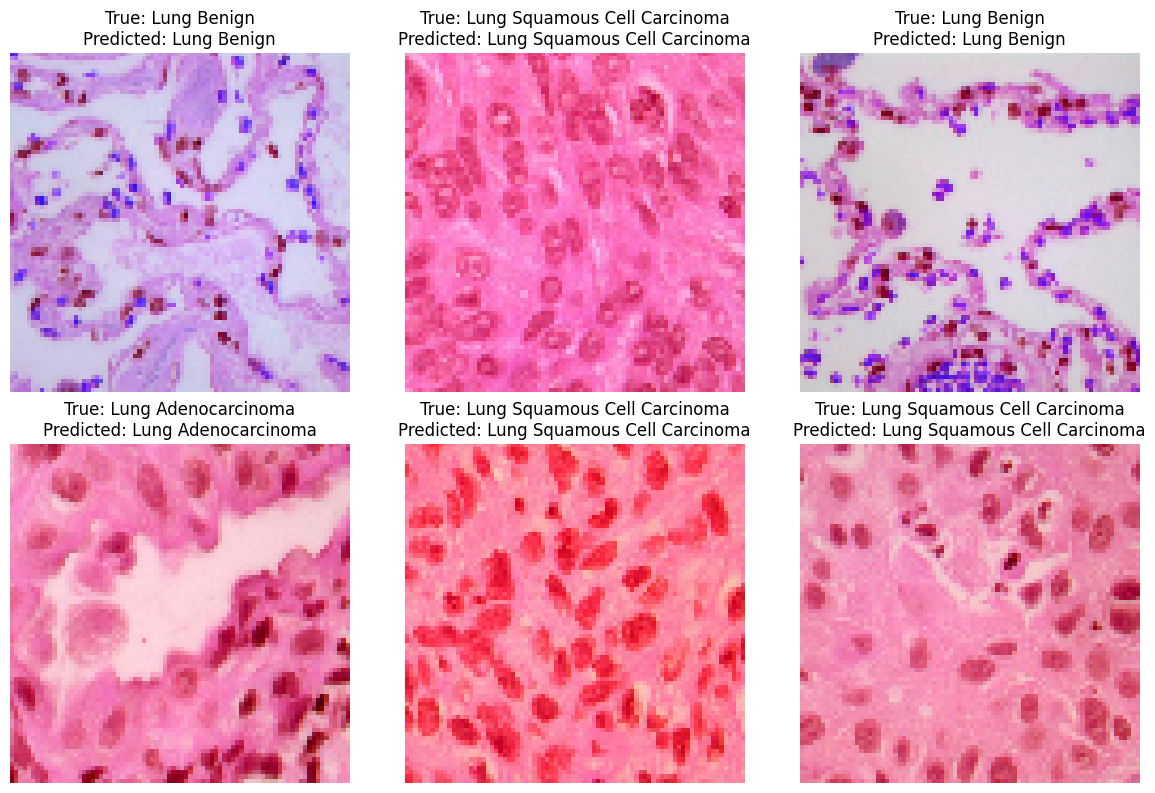

In [41]:
label_to_class = {
    0: 'Lung Benign',
    1: 'Lung Adenocarcinoma',
    2: 'Lung Squamous Cell Carcinoma'
}

# Select a random subset of images to display
num_images_to_display = 6
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, index in enumerate(random_indices):
    image = X_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    axes[i].imshow(image)
    axes[i].set_title(f"True: {label_to_class[true_label]}\nPredicted: {label_to_class[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# *Plot training & validation accuracy values*

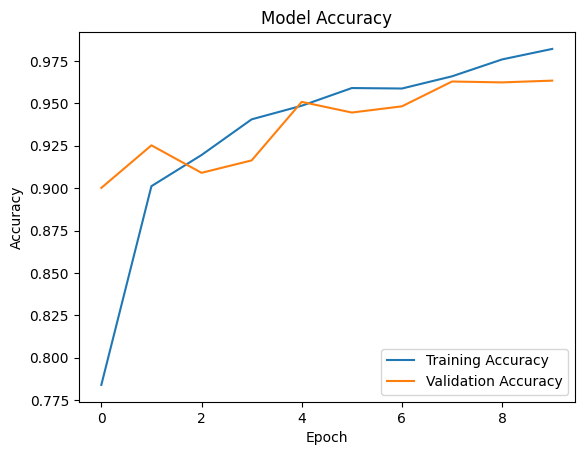

In [36]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# *Plot training & validation loss values*

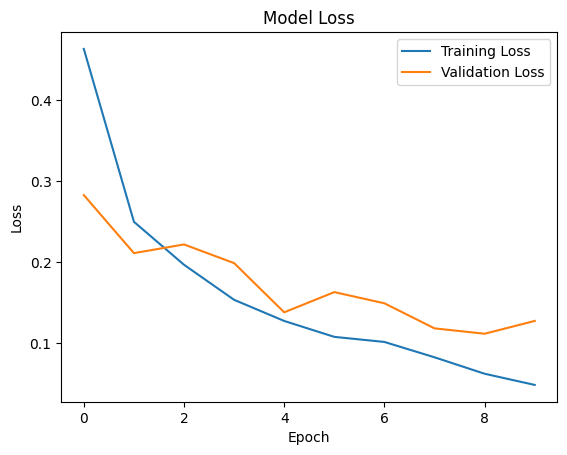

In [37]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# *Confusion Matrix*

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step


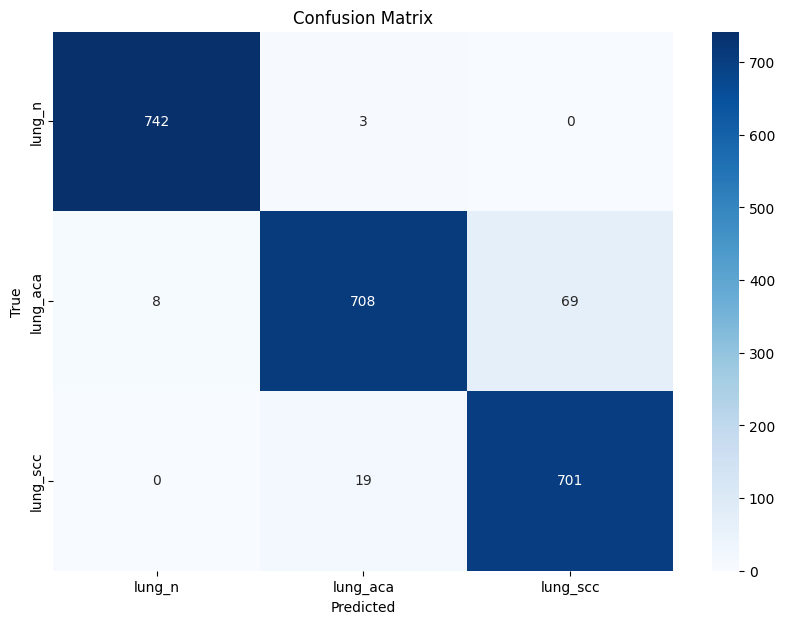

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
y_pred = np.argmax(model1.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['lung_n', 'lung_aca', 'lung_scc'],
            yticklabels=['lung_n', 'lung_aca', 'lung_scc'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# *Saving The Model*

In [39]:
model1.save('lung_model.keras')

# *Testing The Model by Uploading Images and make it Classify Them*

In [45]:
import numpy as np
import cv2
import tensorflow as tf

# Upload a random image
uploaded = files.upload()

# Process the uploaded image
for fn in uploaded.keys():
    path = fn
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

    # Read and preprocess the uploaded image
    img = cv2.imread(path)

    # Resize to the size expected by the model, assuming (80, 80, 3) input shape
    img_resized = cv2.resize(img, (80, 80))
    img_resized_scaled = img_resized / 255.0

    # Convert to a numpy array and expand dimensions to match the model input shape (1, 80, 80, 3)
    img_array = np.expand_dims(img_resized_scaled, axis=0)

    # Ensure the model expects the shape (1, 80, 80, 3), adjust accordingly
    try:
        predictions = model1.predict(img_array)

        # Get the index of the highest probability
        score = tf.nn.softmax(predictions[0])
        predicted_class = np.argmax(score)

        # Mapping the predicted class index back to label
        class_names = ['lung_n', 'lung_aca', 'lung_scc']
        print(f"Prediction: {class_names[predicted_class]}")
    except Exception as e:
        print(f"Error during prediction: {e}")

Saving lungaca83.jpeg to lungaca83.jpeg
User uploaded file "lungaca83.jpeg" with length 53080 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Prediction: lung_aca
